## Military Expenditure Dataset from kaggle  


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import altair as alt

In [2]:
# Loading the dataset
data = pd.read_csv(r'Military Expenditure.csv')

In [3]:
# Indicator Name is of no importance 

data = data.drop(['Indicator Name'], 
                 axis=1)

In [4]:
# One of the instances in the dataset contained the Military Expenditure date for all countries combined.

World = data[data['Name'] == 'World']
World = World.drop(['Code', 'Type'],
                  axis = 1)

World = World.set_index('Name')
World.index = World.index.rename('Year')
World = World.T
World = World.dropna()

World['Year'] = World.index
World["Year"] = pd.to_numeric(World["Year"])

World['World'] = World['World']/1e9


In [5]:
World.tail()

Year,World,Year
2014,1740.0,2014
2015,1640.0,2015
2016,1630.0,2016
2017,1700.0,2017
2018,1780.0,2018


In [6]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

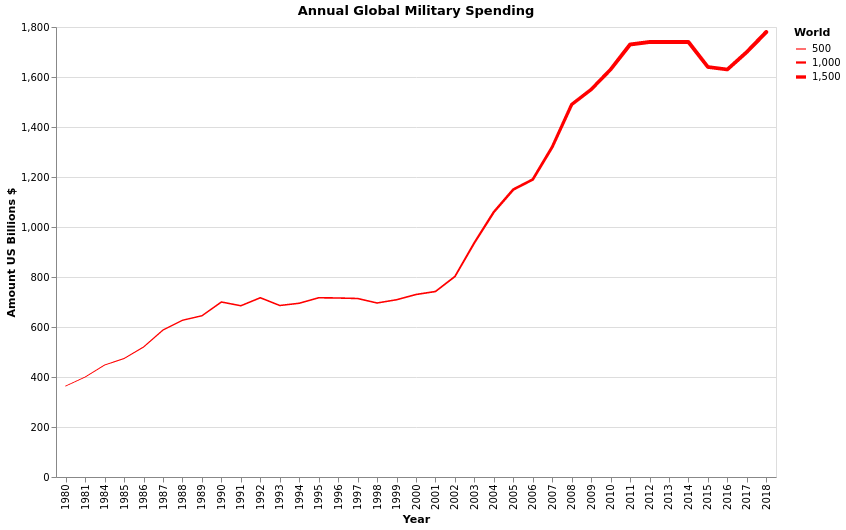

In [7]:
points = alt.Chart(World)\
            .mark_trail()\
            .encode(
                        x = 'Year:N',
                        y = alt.Y(
                                    'World:Q',
                                    axis = alt.Axis(title = 'Amount US Billions $')
                                 ),
                        size = 'World:Q',
                        color = alt.value("red"),
                        tooltip = ['Year',
                                   'World']
                    )\
            .properties(
                            width = 720,
                            height = 450,
                            title = 'Annual Global Military Spending'
                     )\
            .interactive()  


points.save('world.html')
points 

In [8]:
# Filter to get Country data

Countries = data[data['Type']=='Country']
Countries = Countries.drop(['Code', 'Type'], axis=1)
Countries = Countries.set_index('Name')
Countries.index = Countries.index.rename('Year')
Countries = Countries.dropna(axis=0, how='all')
Countries = Countries.T

Countries.tail()

Year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,...,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2014,268227074.2,6.841864e+09,178120368.0,2.275507e+10,4.979443e+09,457807021.8,2.578371e+10,3.305159e+09,3.427180e+09,62177294.74,...,1.034501e+09,6.100000e+11,NaN,1.554727e+09,4.255722e+09,53575787.74,1.714831e+09,3.892469e+09,443604396.0,368100000.0
2015,199518614.8,3.608299e+09,132350667.6,NaN,5.482617e+09,447379807.5,2.404557e+10,2.665410e+09,2.943397e+09,66164584.44,...,9.699068e+08,5.960000e+11,NaN,3.205392e+08,4.562633e+09,49984164.36,NaN,3.488868e+09,372447569.8,376677000.0
2016,185878310.1,2.764055e+09,130853162.6,NaN,4.509648e+09,431396218.6,2.638295e+10,2.885947e+09,1.396969e+09,66462843.08,...,9.882236e+08,6.000000e+11,NaN,2.181549e+08,5.017402e+09,51937624.42,NaN,3.169756e+09,299504759.9,358065000.0
2017,191407113.2,3.062873e+09,144382688.7,NaN,5.459644e+09,443610413.3,2.769111e+10,3.138359e+09,1.528860e+09,63908678.43,...,1.165710e+09,6.060000e+11,NaN,4.648218e+08,5.073854e+09,57262629.27,NaN,3.638937e+09,339664531.4,340522000.0
2018,198086263.3,1.983614e+09,180488725.1,NaN,4.144992e+09,608854649.9,2.671183e+10,3.367460e+09,1.708941e+09,65436595.26,...,1.168131e+09,6.490000e+11,NaN,NaN,5.500000e+09,63344074.22,NaN,3.639879e+09,378025431.0,420364000.0


In [9]:
# Get top 20 Spending Countries

Top_20 = pd.DataFrame((Countries.T['2018']).sort_values(ascending=False)[:20])
Top_20 = Top_20/1e9
Top_20.index = Top_20.index.rename('Country')
Top_20 = Top_20.rename(columns={'2018':'2018 Billion $'})


Top_20['Country'] = Top_20.index
Top_20['Country'] = Top_20.Country.apply(lambda x: str(x))

Top_20.tail(3)

,2018 Billion $,Country
Country,,
Iran,13.194151,Iran
Poland,11.596155,Poland
Pakistan,11.375526,Pakistan


What are the 20 top countries investing in their military?

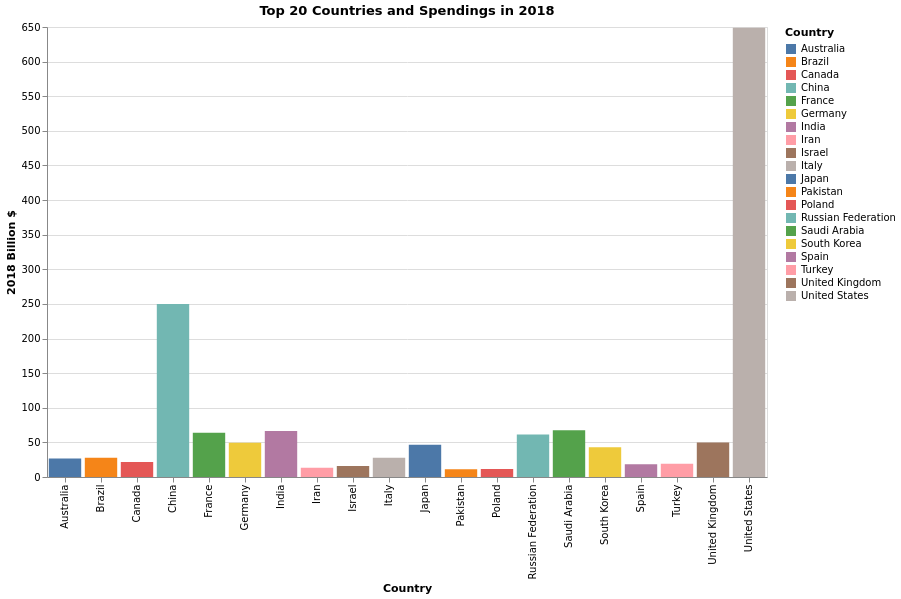

In [10]:
points = alt.Chart(Top_20)\
            .mark_bar()\
            .encode(
                        x = 'Country',
                        y = '2018 Billion $',
                        tooltip = ['Country',
                                   '2018 Billion $'],
                        color='Country',
                    )\
            .properties(
                            width = 720,
                            height = 450,
                            title = 'Top 20 Countries and Spendings in 2018'
                     )\
            .interactive()  

points.save('countries.html')

points 

So we see that America takes the cake with China coming up for a piece too

In [11]:
# Adjust for inflation
Country_world_share = Countries.copy()
cols = Country_world_share.columns

for col in cols:
    Country_world_share[col] = (Country_world_share[col]/ World['World'])*1e11

~~~
Country_world_share = Countries.copy()
cols = Country_world_share.columns

for col in cols:
    Country_world_share[col] = (Country_world_share[col]/ World['World'])*1e11
~~~
  
  
  
_I adjusted the amounts for inflation_

In [12]:
# According to the Global Firepower Index, these 10 countries are the top 10 strongest firepowers. 
# Let's judge their military expenses in the last 3 decades.

USA1 = Country_world_share['United States']
CHN1 = Country_world_share['China']
RUS1 = Country_world_share['Russian Federation']
IND1 = Country_world_share['India']
JPN1 = Country_world_share['Japan']
SK1 = Country_world_share['South Korea']
FRNC1 = Country_world_share['France']
UK1 = Country_world_share['United Kingdom']
EGY1 = Country_world_share['Egypt']
BRA1 = Country_world_share['Brazil']

GFI_10 = pd.DataFrame([USA1, CHN1, RUS1, IND1, JPN1, SK1, FRNC1, UK1, EGY1,BRA1])

GFI_10 = GFI_10.T
GFI_10 = GFI_10.dropna(axis=0, how='all')
GFI_10 = GFI_10/1e17

GFI_10.index = GFI_10.index.rename('Year')

GFI_10['Year'] = GFI_10.index

########################################

USA = Countries['United States']
CHN = Countries['China']
RUS = Countries['Russian Federation']
IND = Countries['India']
JPN = Countries['Japan']
SK = Countries['South Korea']
FRNC = Countries['France']
UK = Countries['United Kingdom']
EGY = Countries['Egypt']
BRA = Countries['Brazil']

GFI_10_b4 = pd.DataFrame([USA, CHN, RUS, IND, JPN, SK, FRNC, UK, EGY,BRA])

GFI_10_b4 = GFI_10_b4.T
GFI_10_b4 = GFI_10_b4.dropna(axis=0, how='all')
GFI_10_b4 = GFI_10_b4/1e9

GFI_10_b4.index = GFI_10_b4.index.rename('Year')

GFI_10_b4['Year'] = GFI_10_b4.index

GFI_10.tail()

,United States,China,Russian Federation,India,Japan,South Korea,France,United Kingdom,Egypt,Brazil,Year
Year,,,,,,,,,,,
2014,350.574713,115.517241,48.676152,29.260982,26.943244,21.581798,36.559522,34.013137,2.922483,18.769893,2014
2015,363.414634,130.487805,40.499212,31.277734,25.674453,22.299250,33.745202,32.842796,3.338714,15.010794,2015
2016,368.098160,132.515337,42.481785,34.747008,28.509992,22.629008,35.189211,29.520824,2.768725,14.861808,2016
2017,356.470588,134.117647,39.133708,37.976138,26.698254,23.041578,35.539705,27.313708,1.626817,17.225324,2017
2018,364.606742,140.449438,34.487386,37.365331,26.189862,24.196614,35.842515,28.088310,1.747190,15.599116,2018


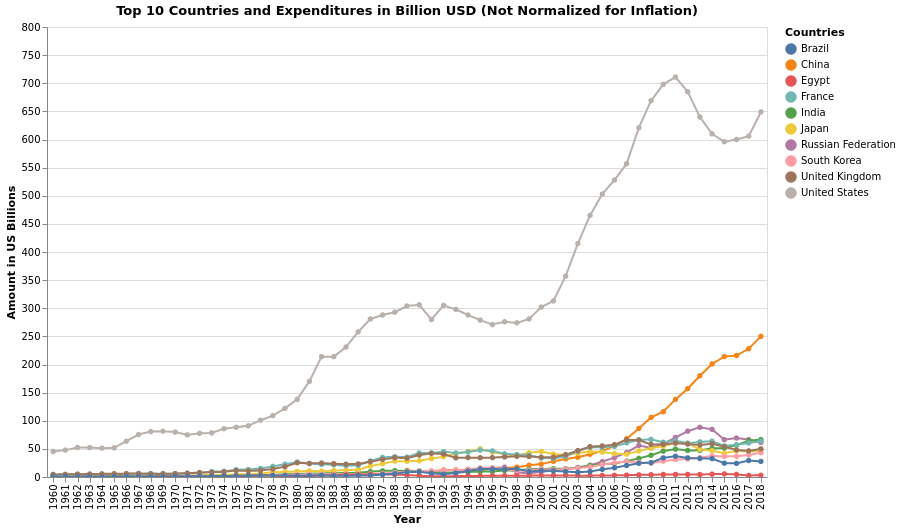

In [13]:
points = alt.Chart(GFI_10_b4)\
            .transform_fold(['United States', 
                             'China', 
                             'Russian Federation', 
                             'India', 
                             'Japan',       
                             'South Korea', 
                             'France', 
                             'United Kingdom', 
                             'Egypt', 
                             'Brazil'])\
            .mark_line(point=True)\
            .encode(
                        y = alt.Y('value:Q', title = 'Amount in US Billions'),
                        x = 'Year',
                        tooltip = ['value:Q',
                                   'Year'],
                        color= alt.Color('key:N', title= 'Countries'),
                    )\
            .properties(
                            width = 720,
                            height = 450,
                            title = 'Top 10 Countries and Expenditures in Billion USD (Not Normalized for Inflation)'
                     )\
            .interactive()  

points.save('GFI_.html')

points 

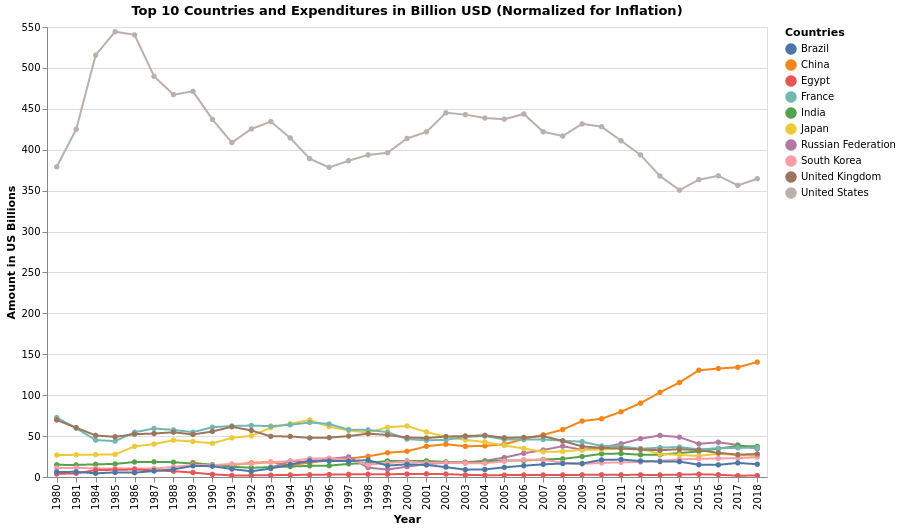

In [14]:
points = alt.Chart(GFI_10)\
            .transform_fold(['United States', 
                             'China', 
                             'Russian Federation', 
                             'India', 
                             'Japan',       
                             'South Korea', 
                             'France', 
                             'United Kingdom', 
                             'Egypt', 
                             'Brazil'])\
            .mark_line(point=True)\
            .encode(
                        y = alt.Y('value:Q', title = 'Amount in US Billions'),
                        x = 'Year',
                        tooltip = ['value:Q',
                                   'Year'],
                        color= alt.Color('key:N', title = 'Countries'),
                    )\
            .properties(
                            width = 720,
                            height = 450,
                            title = 'Top 10 Countries and Expenditures in Billion USD (Normalized for Inflation)'
                     )\
            .interactive()  

points.save('GFI.html')

points 

Okay we can see a difference in the types of graphs from before and after inflation  
Common thing is right from the begining we see the US poised to fight 🙄 and the other countries pulling their feet till 1975.

In [15]:
# Looking at some countries in Africa

NG = Country_world_share['Nigeria']
EGY = Country_world_share['Egypt']
SA = Country_world_share['South Africa']
ALG = Country_world_share['Algeria']
SUD = Country_world_share['Sudan']
EQG = Country_world_share['Equatorial Guinea']

AFR_10 = pd.DataFrame([NG,EGY,  SA, ALG, SUD, EQG])

AFR_10 = AFR_10.T

AFR_10 = AFR_10.dropna(axis=0, how='all')
AFR_10 = AFR_10/1e15

AFR_10.index = AFR_10.index.rename('Year')

AFR_10['Year'] = AFR_10.index
AFR_10['Year'] = pd.to_numeric(AFR_10['Year'])

Finally look at some countries in africa.

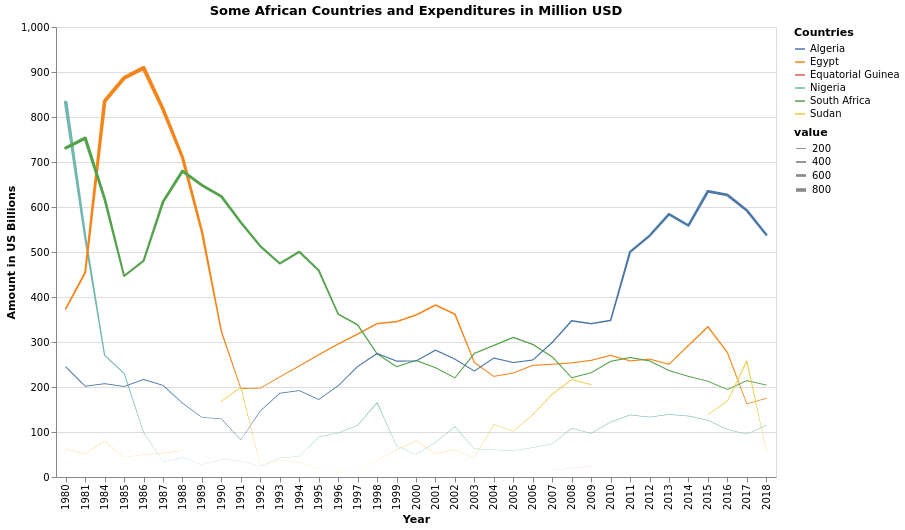

In [16]:
AFR = AFR_10.melt('Year')

point = alt.Chart(AFR)\
           .mark_trail(size=2)\
           .encode(
                    x = alt.X('Year:O'),
                    y = alt.Y('value', stack=None, title = 'Amount in US Billions'),
                    tooltip = ['value:Q',
                               'variable',
                               'Year'],
                    color = alt.Color('variable:N', title = 'Countries'),
                    size = 'value:Q'
                   )\
           .properties(
                            width = 720,
                            height = 450,
                            title = 'Some African Countries and Expenditures in Million USD'
                     )\
           .interactive()  

point.save('AFR.html')

point 


__I wanted to look at some countries in Africa  

_Egypt (1986)_ : Riots by the paramilitary force in and around Cairo due to a rumour about prolonged compulsory service, targeting tourist areas.  
And the Mubarak regime crushed the riot with the Egyptian Army.

In [17]:
# !jupyter nbconvert index.ipynb --to slides --post serve  --SlidesExporter.reveal_scroll=True